In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data.clean.dvf import DVF

pd.options.display.max_columns = None

In [2]:
dvf = DVF()

In [3]:
dvf_df = dvf.full_dataframe()

In [57]:
max_record_per_mutation = 6

dvf_2024 = dvf_df[dvf_df["date_mutation"].between("2024-01-01", "2024-12-31")]
dvf_2024_idf = dvf_2024[dvf_2024["code_region"] == "11"]

dvf_only_appartements = dvf_2024_idf[dvf_2024_idf["type_local"] == "Appartement"]

dvf_only_ventes = dvf_only_appartements[dvf_only_appartements["nature_mutation"] == "Vente"]

mutations_id_bellow_threshold = []
for mutation in pd.unique(dvf_only_ventes["id_mutation"]):
    if len(dvf_only_ventes[dvf_only_ventes["id_mutation"] == mutation]) <= max_record_per_mutation:
        mutations_id_bellow_threshold.append(mutation)

filtered_dvf = dvf_only_ventes[dvf_only_ventes["id_mutation"].isin(mutations_id_bellow_threshold)]


In [60]:
filtered_dvf.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,id_parcelle,...,altitude_moyenne,superficie,population,geo_point_2d,id_geofla,code_commune,code_canton,code_arrondissement,code_departement,code_region
1844568,2024-513342,2024-03-11,1,Vente,45000.0,137,<NA>,BD D AULNAY,0080,930770000A0056,...,64.0,403.0,28.0,"48.884837002092105, 2.508934060353894",7199,77,34,1,93,11
1844570,2024-513343,2024-02-27,1,Vente,255000.0,31,<NA>,AV JEAN LOLIVE,4738,93055000AO0225,...,53.0,504.0,52.2,"48.89830938758385, 2.4087214747535",29574,55,97,1,93,11
1844573,2024-513345,2024-03-14,1,Vente,272000.0,50,<NA>,AV JEAN JAURES,4735,930550000I0217,...,53.0,504.0,52.2,"48.89830938758385, 2.4087214747535",29574,55,97,1,93,11
1844575,2024-513346,2024-03-19,1,Vente,155000.0,118,<NA>,AV JEAN JAURES,4710,93031000AU0118,...,38.0,459.0,53.8,"48.95501320616889, 2.3145304323082883",16699,31,12,3,93,11
1844577,2024-513347,2024-03-12,1,Vente,140000.0,17,<NA>,RUE DU DOC FLEMING,1045,93005000DL0127,...,54.0,1614.0,82.5,"48.94583843673866, 2.4932904168711643",15697,5,93,2,93,11


In [61]:
len(pd.unique(filtered_dvf["id_mutation"]))

18517

In [62]:
len(filtered_dvf["id_mutation"])

29148

In [74]:
len(pd.unique(filtered_dvf["lot5_surface_carrez"]))
filtered_dvf[~filtered_dvf["lot5_surface_carrez"].isna()].head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,code_insee,code_postal,commune,departement,region,statut,altitude_moyenne,superficie,population,geo_point_2d,id_geofla,code_commune,code_canton,code_arrondissement,code_departement,code_region
4614399,2024-544751,2024-05-24,1,Vente,685000.0,54,<NA>,RUE LAUGIER,5391,75117000AX0123,<NA>,116,NaN,117,NaN,42,NaN,46,NaN,88,69.56,7.0,2,Appartement,70.0,3.0,<NA>,<NA>,<NA>,<NA>,NaN,2.293484,48.883373,000AX,75117,75017,PARIS-17E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,40.0,563.0,168.5,"48.88733716648682, 2.307485559493426",36583,117,31,1,75,11
4615317,2024-545215,2024-05-20,1,Vente,664050.0,62,<NA>,RUE NOTRE-DAME DE NAZARETH,6834,75103000AB0059,<NA>,10,NaN,11,NaN,45,NaN,63,NaN,9,61.16,5.0,2,Appartement,62.0,2.0,<NA>,<NA>,<NA>,<NA>,NaN,2.356977,48.867907,000AB,75103,75003,PARIS-3E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,35.0,116.0,35.7,"48.86305413181178, 2.359361058970589",36582,103,17,1,75,11
4616386,2024-545776,2024-06-13,1,Vente,1534300.0,92,<NA>,RUE JOUFFROY D'ABBANS,5031,75117000BI0005,<NA>,10,NaN,11,NaN,12,NaN,13,NaN,32,124.05,8.0,2,Appartement,115.0,5.0,<NA>,<NA>,<NA>,<NA>,NaN,2.303195,48.883281,000BI,75117,75017,PARIS-17E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,40.0,563.0,168.5,"48.88733716648682, 2.307485559493426",36583,117,31,1,75,11
4618725,2024-546955,2024-01-19,1,Vente,414300.0,69,<NA>,RUE CLAUDE BERNARD,2069,75105000BD0051,<NA>,207,NaN,208,NaN,245,NaN,246,NaN,263,33.50,5.0,2,Appartement,37.0,1.0,<NA>,<NA>,<NA>,<NA>,NaN,2.343855,48.840808,000BD,75105,75005,PARIS-5E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,42.0,252.0,61.5,"48.844508659617546, 2.349859385560182",13706,105,19,1,75,11
4619118,2024-547167,2024-01-23,1,Vente,3100000.0,46,<NA>,RUE SAINT PLACIDE,8735,75106000BF0024,<NA>,26,NaN,27,NaN,28,NaN,29,165.27,30,1.00,15.0,2,Appartement,157.0,4.0,<NA>,<NA>,<NA>,<NA>,NaN,2.325670,48.847892,000BF,75106,75006,PARIS-6E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,40.0,215.0,43.1,"48.84896809191946, 2.332670898588416",9608,106,20,1,75,11


In [64]:
current_mutation = filtered_dvf[filtered_dvf["id_mutation"] == '2024-510910'].copy()

In [65]:
current_mutation

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,id_parcelle,...,altitude_moyenne,superficie,population,geo_point_2d,id_geofla,code_commune,code_canton,code_arrondissement,code_departement,code_region
13224275,2024-510910,2024-06-25,1,Vente,650000.0,39,<NA>,AV EDOUARD VAILLANT,3120,92012000AT0048,...,33.0,615.0,113.1,"48.836584313752894, 2.239135990584618",36061,12,89,3,92,11
13224276,2024-510910,2024-06-25,1,Vente,650000.0,39,<NA>,AV EDOUARD VAILLANT,3120,92012000AT0048,...,33.0,615.0,113.1,"48.836584313752894, 2.239135990584618",36061,12,89,3,92,11


In [66]:
records_per_mutation = {}
for mutation in pd.unique(filtered_dvf["id_mutation"]):
    records_per_mutation[mutation] = len(filtered_dvf[filtered_dvf["id_mutation"] == mutation])

print(records_per_mutation)

{'2024-513342': 1, '2024-513343': 1, '2024-513345': 1, '2024-513346': 1, '2024-513347': 1, '2024-513348': 1, '2024-513349': 1, '2024-513350': 1, '2024-513353': 1, '2024-513354': 1, '2024-513356': 1, '2024-513359': 1, '2024-513363': 1, '2024-513366': 1, '2024-513368': 1, '2024-513370': 2, '2024-513372': 1, '2024-513373': 1, '2024-513374': 1, '2024-513376': 1, '2024-513377': 1, '2024-513383': 1, '2024-513384': 1, '2024-513388': 1, '2024-513389': 1, '2024-513391': 1, '2024-513393': 1, '2024-513396': 1, '2024-513399': 1, '2024-513405': 2, '2024-513406': 1, '2024-513407': 1, '2024-513408': 1, '2024-513409': 1, '2024-513410': 1, '2024-513411': 1, '2024-513413': 1, '2024-513415': 1, '2024-513417': 1, '2024-513422': 1, '2024-513425': 1, '2024-513426': 1, '2024-513427': 1, '2024-513428': 1, '2024-513429': 1, '2024-513430': 1, '2024-513432': 1, '2024-513435': 1, '2024-513436': 1, '2024-513437': 1, '2024-513440': 5, '2024-513441': 1, '2024-513443': 1, '2024-513445': 1, '2024-513446': 1, '2024-513

In [67]:
unique_values, counts = np.unique(list(records_per_mutation.values()), return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 1, Count: 9898
Value: 2, Count: 7186
Value: 3, Count: 1046
Value: 4, Count: 285
Value: 5, Count: 12
Value: 6, Count: 90


([<matplotlib.axis.XTick at 0x7590b027b980>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

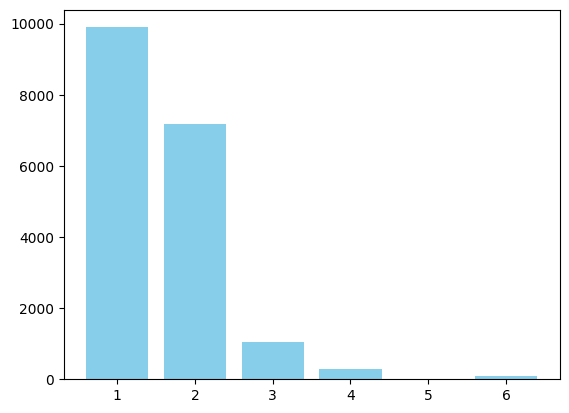

In [68]:
plt.bar(unique_values[:20], counts[:20], color='skyblue')
plt.xticks(unique_values[:20].astype(int))

In [75]:
unique_values, counts = np.unique(filtered_dvf["nombre_lots"], return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0.0, Count: 659
Value: 1.0, Count: 14673
Value: 2.0, Count: 12056
Value: 3.0, Count: 1188
Value: 4.0, Count: 342
Value: 5.0, Count: 101
Value: 6.0, Count: 66
Value: 7.0, Count: 27
Value: 8.0, Count: 17
Value: 9.0, Count: 9
Value: 10.0, Count: 2
Value: 11.0, Count: 2
Value: 12.0, Count: 3
Value: 13.0, Count: 1
Value: 15.0, Count: 2


In [79]:
filtered_dvf[filtered_dvf["nombre_lots"] == 0.0].head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,code_insee,code_postal,commune,departement,region,statut,altitude_moyenne,superficie,population,geo_point_2d,id_geofla,code_commune,code_canton,code_arrondissement,code_departement,code_region
1844707,2024-513415,2024-03-12,1,Vente,650000.0,252,<NA>,AV DU PDT WILSON,7275,93066000CF0002,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,0.0,2,Appartement,18.0,2.0,S,sols,<NA>,<NA>,104.0,2.358163,48.917141,000CF,93066,93200/93210,SAINT-DENIS,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Sous-préfecture,34.0,1238.0,105.7,"48.929565045530566, 2.359242997495927",26730,66,98,3,93,11
1844771,2024-513440,2024-03-20,1,Vente,1562760.0,187,<NA>,RUE EDOUARD BRANLY,3121,930480000D0261,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,0.0,2,Appartement,40.0,2.0,S,sols,<NA>,<NA>,136.0,2.464433,48.876045,0000D,93048,93100,MONTREUIL,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,91.0,890.0,103.2,"48.863317505427545, 2.448162118570861",33943,48,96,1,93,11
1844773,2024-513440,2024-03-20,1,Vente,1562760.0,187,<NA>,RUE EDOUARD BRANLY,3121,930480000D0261,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,0.0,2,Appartement,62.0,2.0,S,sols,<NA>,<NA>,136.0,2.464433,48.876045,0000D,93048,93100,MONTREUIL,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,91.0,890.0,103.2,"48.863317505427545, 2.448162118570861",33943,48,96,1,93,11
1844774,2024-513440,2024-03-20,1,Vente,1562760.0,187,<NA>,RUE EDOUARD BRANLY,3121,930480000D0261,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,0.0,2,Appartement,40.0,2.0,S,sols,<NA>,<NA>,136.0,2.464433,48.876045,0000D,93048,93100,MONTREUIL,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,91.0,890.0,103.2,"48.863317505427545, 2.448162118570861",33943,48,96,1,93,11
1844775,2024-513440,2024-03-20,1,Vente,1562760.0,187,<NA>,RUE EDOUARD BRANLY,3121,930480000D0261,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,0.0,2,Appartement,40.0,2.0,S,sols,<NA>,<NA>,136.0,2.464433,48.876045,0000D,93048,93100,MONTREUIL,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,91.0,890.0,103.2,"48.863317505427545, 2.448162118570861",33943,48,96,1,93,11


In [77]:
filtered_dvf[filtered_dvf["nombre_lots"] == 1.0].head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,code_insee,code_postal,commune,departement,region,statut,altitude_moyenne,superficie,population,geo_point_2d,id_geofla,code_commune,code_canton,code_arrondissement,code_departement,code_region
1844568,2024-513342,2024-03-11,1,Vente,45000.0,137,<NA>,BD D AULNAY,0080,930770000A0056,<NA>,3,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,1.0,2,Appartement,12.0,1.0,<NA>,<NA>,<NA>,<NA>,NaN,2.506562,48.897793,0000A,93077,93250,VILLEMOMBLE,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,64.0,403.0,28.0,"48.884837002092105, 2.508934060353894",7199,77,34,1,93,11
1844575,2024-513346,2024-03-19,1,Vente,155000.0,118,<NA>,AV JEAN JAURES,4710,93031000AU0118,<NA>,7,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,1.0,2,Appartement,63.0,3.0,<NA>,<NA>,<NA>,<NA>,NaN,2.323127,48.957423,000AU,93031,93800,EPINAY-SUR-SEINE,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,38.0,459.0,53.8,"48.95501320616889, 2.3145304323082883",16699,31,12,3,93,11
1844577,2024-513347,2024-03-12,1,Vente,140000.0,17,<NA>,RUE DU DOC FLEMING,1045,93005000DL0127,<NA>,90,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,1.0,2,Appartement,85.0,4.0,<NA>,<NA>,<NA>,<NA>,NaN,2.517322,48.952566,000DL,93005,93600,AULNAY-SOUS-BOIS,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,54.0,1614.0,82.5,"48.94583843673866, 2.4932904168711643",15697,5,93,2,93,11
1844581,2024-513349,2024-03-11,1,Vente,102000.0,98,<NA>,PAS DES ROSES,8160,93001000AU0072,<NA>,8,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,1.0,2,Appartement,30.0,2.0,<NA>,<NA>,<NA>,<NA>,NaN,2.391660,48.912273,000AU,93001,93300,AUBERVILLIERS,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,40.0,577.0,74.7,"48.91217226264496, 2.384455137684569",6646,1,92,3,93,11
1844588,2024-513353,2024-03-04,1,Vente,63000.0,103,<NA>,ALL DE NEMOURS,1850,930460000A5039,<NA>,6,26.97,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,1.0,2,Appartement,28.0,1.0,<NA>,<NA>,<NA>,<NA>,NaN,2.519998,48.924383,0000A,93046,93190,LIVRY-GARGAN,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,69.0,736.0,41.2,"48.91976332125543, 2.534865923320668",28828,46,14,2,93,11


In [78]:
filtered_dvf[filtered_dvf["nombre_lots"] == 2.0].head()


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,code_insee,code_postal,commune,departement,region,statut,altitude_moyenne,superficie,population,geo_point_2d,id_geofla,code_commune,code_canton,code_arrondissement,code_departement,code_region
1844570,2024-513343,2024-02-27,1,Vente,255000.0,31,<NA>,AV JEAN LOLIVE,4738,93055000AO0225,<NA>,108,NaN,244,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,2.0,2,Appartement,51.0,2.0,<NA>,<NA>,<NA>,<NA>,NaN,2.399999,48.890994,000AO,93055,93500,PANTIN,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,53.0,504.0,52.2,"48.89830938758385, 2.4087214747535",29574,55,97,1,93,11
1844573,2024-513345,2024-03-14,1,Vente,272000.0,50,<NA>,AV JEAN JAURES,4735,930550000I0217,<NA>,13,NaN,16,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,2.0,2,Appartement,67.0,3.0,<NA>,<NA>,<NA>,<NA>,NaN,2.391450,48.902156,0000I,93055,93500,PANTIN,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,53.0,504.0,52.2,"48.89830938758385, 2.4087214747535",29574,55,97,1,93,11
1844579,2024-513348,2024-03-15,1,Vente,134000.0,7,<NA>,RUE CHARLES HIVER,0450,930460000E1725,<NA>,16,NaN,39,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,2.0,2,Appartement,49.0,2.0,<NA>,<NA>,<NA>,<NA>,NaN,2.545825,48.924836,0000E,93046,93190,LIVRY-GARGAN,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,69.0,736.0,41.2,"48.91976332125543, 2.534865923320668",28828,46,14,2,93,11
1844584,2024-513350,2024-03-18,1,Vente,308000.0,2,<NA>,AV ROGER BALLU,0790,930330000C0387,<NA>,134,64.42,67,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,2.0,2,Appartement,65.0,3.0,<NA>,<NA>,<NA>,<NA>,NaN,2.579378,48.862015,0000C,93033,93460,GOURNAY-SUR-MARNE,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Commune simple,40.0,166.0,6.4,"48.86058179017992, 2.575433137961149",33989,33,19,2,93,11
1844591,2024-513354,2024-03-08,1,Vente,155000.0,9,<NA>,RUE PIERRE BROSSOLETTE,1105,93073000AS0341,<NA>,109,NaN,172,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,2.0,2,Appartement,70.0,3.0,<NA>,<NA>,<NA>,<NA>,NaN,2.573014,48.949057,000AS,93073,93290,TREMBLAY-EN-FRANCE,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,81.0,2259.0,35.0,"48.97843041205846, 2.554685015432852",5650,73,33,2,93,11
